Chicago Craigslist Rent Data Scrape v.0

In [0]:
#import get to call a get request on the site
from requests import get

In [5]:

#get the first page of the city of chicago housing prices
response = get('https://chicago.craigslist.org/search/chc/apa?') #get rid of those lame-o's that post a housing option without a pic using their filter

print(response.text[:500])

﻿<!DOCTYPE html>
<html class="no-js"><head>
    <title>chicago apts/housing for rent  - craigslist</title>

    <meta name="description" content="chicago apts/housing for rent  - craigslist">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge"/>
    <link rel="canonical" href="https://chicago.craigslist.org/search/chc/apa">
    <link rel="alternate" type="application/rss+xml" href="https://chicago.craigslist.org/search/chc/apa?format=rss" title="RSS feed for craigslist | chicago apts/housin


In [0]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [8]:
#grab the HTML as a BS4 soup object
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [9]:
#get the macro-container for the housing posts
posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print(len(posts)) #to double check I got 50 (elements/page)

<class 'bs4.element.ResultSet'>
120


In [10]:
#grab the first post
post_one = posts[0]
post_one

<li class="result-row" data-pid="7036524103" data-repost-of="3428031990">
<a class="result-image gallery" data-ids="1:00d0d_i9Rtn2Y8p0Z,1:01414_lO50rwiu1ol,1:00s0s_a8RonfcaXvl,1:00n0n_7Jx7J293Slb,1:00a0a_hnZy8XSUT2w,1:00606_jK6Xvc1vNmj" href="https://chicago.craigslist.org/chc/apa/d/chicago-1-bravail-1-1pets-okfits-kingin/7036524103.html">
<span class="result-price">$1000</span>
</a>
<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2019-12-11 11:36" title="Wed 11 Dec 11:36:48 AM">Dec 11</time>
<a class="result-title hdrlnk" data-id="7036524103" href="https://chicago.craigslist.org/chc/apa/d/chicago-1-bravail-1-1pets-okfits-kingin/7036524103.html">1 BR****AVAIL 1/1**pets ok**FITS KING***IN UNIT LAUNDRY!!!!**</a>
<span class="result-meta">
<span class="result-price">$1000</span>
<span class="housing">
                    1br -
                    900ft<sup>2</sup> -
 

In [11]:
#grab the price of the first post
post_one_price = post_one.a.text
post_one_price

'\n$1000\n'

In [12]:

#grab the time of the post in datetime format to save on cleaning efforts
post_one_time = post_one.find('time', class_= 'result-date')
post_one_datetime = post_one_time['datetime']

#split them and grab each element of the resulting list to get date and time
post_one_datetime = post_one_datetime.split(' ')
post_one_date = post_one_datetime[0]
post_one_date

#element 2 is the time
post_one_time = post_one_datetime[1]

post_one_time

'11:36'

In [13]:
#title is a and that class, link is grabbing the href attribute of that variable
post_one_title = post_one.find('a', class_='result-title hdrlnk')
post_one_link = post_one_title['href']
post_one_link

'https://chicago.craigslist.org/chc/apa/d/chicago-1-bravail-1-1pets-okfits-kingin/7036524103.html'

In [14]:
#easy to grab the post title by taking the text element of the title variable
post_one_title_text = post_one_title.text
post_one_title_text

'1 BR****AVAIL 1/1**pets ok**FITS KING***IN UNIT LAUNDRY!!!!**'

In [15]:
#the neighborhood is grabbed by finding the span class 'result-hood' and pulling the text element from that
post_one_hood = post_one.find('span', class_= 'result-hood').text
post_one_hood

' (PILSEN)'

In [17]:
#build out the loop
from time import sleep
from random import randint
from warnings import warn
from time import time
from IPython.core.display import clear_output
import numpy as np

#find the total number of posts to find the limit of the pagination
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text)

pages = np.arange(0, results_total, 120)

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
post_links = []
post_prices = []

for page in pages:
    
    #get request
    response = get("https://chicago.craigslist.org/search/chc/apa?" 
                   + "s=" 
                   + str(page) 
                   + "&hasPic=1"
                   + "&availabilityMode=0")

    sleep(randint(1,5))
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:

        if post.find('span', class_ = 'result-hood') is not None:

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)

            post_price = post.a.text
            post_prices.append(post_price)


    iterations += 1
    print("Finished iteration: " + str(iterations))

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
Finished iteration: 6
Finished iteration: 7
Finished iteration: 8
Finished iteration: 9
Finished iteration: 10
Finished iteration: 11
Finished iteration: 12
Finished iteration: 13
Finished iteration: 14
Finished iteration: 15
Finished iteration: 16
Finished iteration: 17
Finished iteration: 18
Finished iteration: 19
Finished iteration: 20
Finished iteration: 21
Finished iteration: 22
Finished iteration: 23
Finished iteration: 24
Finished iteration: 25


In [18]:
import pandas as pd

eb_rooms = pd.DataFrame({'posted': post_timing,
                       'neighborhood': post_hoods,
                       'post title': post_title_texts,
                       'URL': post_links,
                       'price': post_prices})
print(eb_rooms.info())
eb_rooms.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 5 columns):
posted          2975 non-null object
neighborhood    2975 non-null object
post title      2975 non-null object
URL             2975 non-null object
price           2975 non-null object
dtypes: object(5)
memory usage: 116.3+ KB
None


,posted,neighborhood,post title,URL,price
2965,2019-12-10 15:56,(922 W. Eastwood),Eastwood St Remodeled Studios Walk To The Lake,https://chicago.craigslist.org/chc/apa/d/chica...,\n$750\n
2966,2019-12-10 15:54,(Andersonville-Ravenswood),Beautiful Newly Gut Rehabbed Andersonville-Rav...,https://chicago.craigslist.org/chc/apa/d/chica...,\n$1650\n
2967,2019-12-10 15:49,(Lincoln Park),2 Bedroom,https://chicago.craigslist.org/chc/apa/d/chica...,\n$1800\n
2968,2019-12-10 15:47,(Logan Square),Studio Apartment - One block from Logan Square...,https://chicago.craigslist.org/chc/apa/d/chica...,\n$995\n
2969,2019-12-10 15:44,(7445 N. Claremont),Claremont St. 1 Bedroom In Rogers Park,https://chicago.craigslist.org/chc/apa/d/evans...,\n$925\n
2970,2019-12-10 15:42,(Gold Coast),Great Value - Two bedroom apartment near lake ...,https://chicago.craigslist.org/chc/apa/d/great...,\n$3220\n
2971,2019-12-10 15:42,(Logan Square),Spacious Studio 1 Block from Logan Square Blue...,https://chicago.craigslist.org/chc/apa/d/chica...,\n$1095\n
2972,2019-12-10 15:40,(Logan Square),Newly renovated 2 brm 1st floor apartment,https://chicago.craigslist.org/chc/apa/d/chica...,\n$1450\n
2973,2019-12-10 15:38,"(KENMORE AND CATALPA, EDGEWATER)","BRYN MAWR REDLINE NEW REMODELED S/S 2BR! HWF,M...",https://chicago.craigslist.org/chc/apa/d/chica...,\n$1695\n
2974,2019-12-10 15:37,(Chicago: Edgewater),Affordable One Bed In Edgewater: Available Now!,https://chicago.craigslist.org/chc/apa/d/chica...,\n$1050\n


In [0]:
#########DATA CLEANING PORTION BELOW

In [19]:
#convert datetime string into datetime object to be able to work with it
from datetime import datetime

eb_rooms['posted'] = pd.to_datetime(eb_rooms['posted'])
eb_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 5 columns):
posted          2975 non-null datetime64[ns]
neighborhood    2975 non-null object
post title      2975 non-null object
URL             2975 non-null object
price           2975 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 116.3+ KB


In [0]:
eb_rooms['price'] = eb_rooms['price'].astype(str)

In [0]:
import re

eb_rooms['price'] = eb_rooms['price'].apply(lambda x: re.sub(r'[\n$]+', '', x))

#replace '' with NaN values in the df before turning the column to int so data shape is maintained

In [0]:
import numpy as np
eb_rooms['price'].replace('', np.nan, inplace=True)

In [0]:
#drop the NAs, I don't like them and we have a lot of data
eb_rooms = eb_rooms.dropna()


In [0]:
#first remove the parentheses
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[()]+', '', x))

#and the /
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[/]+', '', x))

#and commas
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[,]+', '', x))

In [0]:
#people spam craigslist so how many of these are unique?
eb_rooms = eb_rooms.drop_duplicates(subset='URL')

In [0]:
#now turn the price to int
eb_rooms['price'] = eb_rooms['price'].astype(int)

In [29]:
eb_rooms.info() #finally a quantitative variable!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 118
Data columns (total 5 columns):
posted          117 non-null datetime64[ns]
neighborhood    117 non-null object
post title      117 non-null object
URL             117 non-null object
price           117 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.5+ KB


In [0]:
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: x.lstrip(' '))

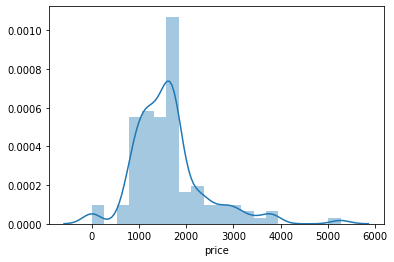

In [31]:
#start to look at the distributions
from matplotlib import figure
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(eb_rooms['price']);

In [34]:
pd.set_option('display.max_rows', 500)
eb_rooms['neighborhood']

0                                                 PILSEN
1                               Chicago - Lakeshore East
2                                   Chicago - South Loop
3                                   Chicago - South Loop
4                                       6725 S. East End
5                                             South Loop
6                                            Irving Park
7                                             South Loop
8                                                 Uptown
9                                                 Uptown
10                                   1436-40 W Thorndale
11                                   4508 N Central Park
12                                       3257 W Eastwood
13                                  Chicago - South Loop
14                                           River North
15                                      4142 N. Keystone
16                                         1234 W Loyola
17                        South

In [41]:
pd.options.display.max_colwidth = 100
#Check for cheap listing in river north that are under specified price
cheap_rn = eb_rooms[(eb_rooms['price'] < 4000) & (eb_rooms['neighborhood'] == 'Logan Square')]
cheap_rn

,posted,neighborhood,post title,URL,price
45,2019-12-11 08:13:00,Logan Square,Brand new 2BR/1BA in humboldt park/logan square near 606 trail,https://chicago.craigslist.org/chc/apa/d/chicago-brand-new-2br-1ba-in-humboldt/7036376905.html,1750
90,2019-12-10 18:48:00,Logan Square,Beautiful Logan Square 3 bedroom,https://chicago.craigslist.org/chc/apa/d/chicago-beautiful-logan-square-3-bedroom/7036186587.html,1500
112,2019-12-10 15:47:00,Logan Square,Studio Apartment - One block from Logan Square Blue Line,https://chicago.craigslist.org/chc/apa/d/chicago-studio-apartment-one-block-from/7036076836.html,995
115,2019-12-10 15:42:00,Logan Square,Spacious Studio 1 Block from Logan Square Blue Line,https://chicago.craigslist.org/chc/apa/d/chicago-spacious-studio-1-block-from/7036073605.html,1095
116,2019-12-10 15:40:00,Logan Square,Newly renovated 2 brm 1st floor apartment,https://chicago.craigslist.org/chc/apa/d/chicago-newly-renovated-2-brm-1st-floor/7036071861.html,1450


In [0]:
#This version is very basic and will need to combine "neighborhoods" here to get more accurate results. Along with that, we are going to have to scan the data for mispellings which happen ALOT on craigslist...